In [42]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,roc_curve, auc,roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import warnings
from tabulate import tabulate

warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


View the summary of the dataset

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Check data types of columns of data frame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Identify Missing values, NAN in variables

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Check the distribution of variables using histograms

In [14]:
df_hist = df.select_dtypes(include='number')
df_hist=df_hist.drop(columns='Id',axis=1)


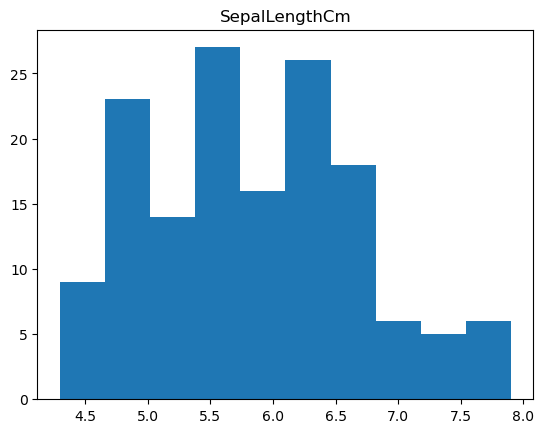

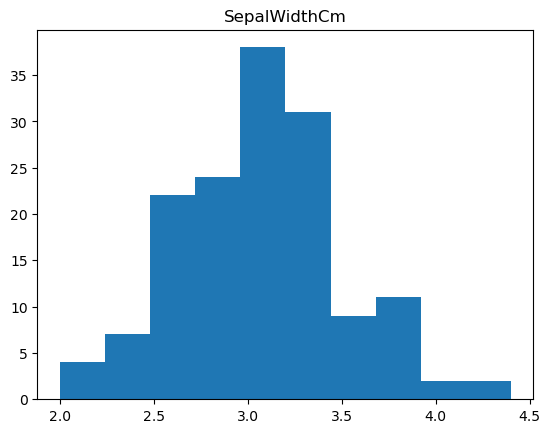

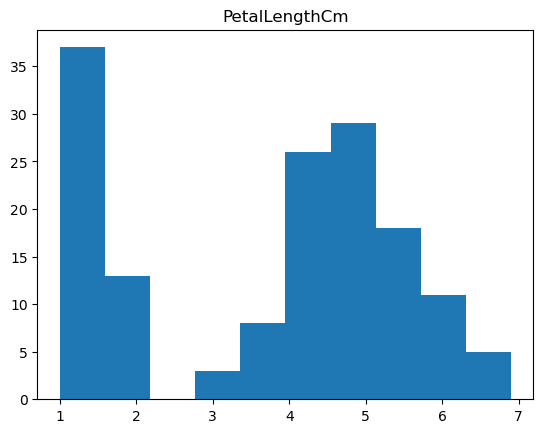

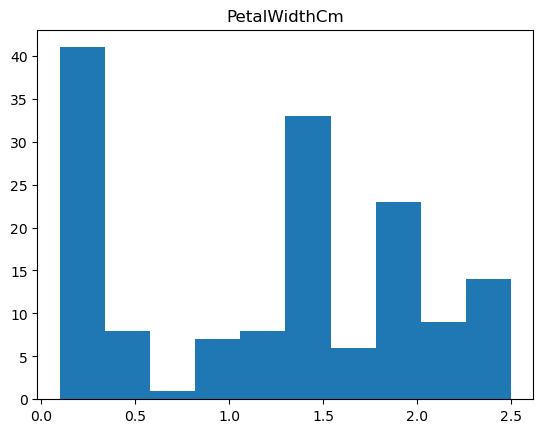

In [15]:
for col in df_hist.columns:
    plt.hist(df_hist[col])
    plt.title(col)
    plt.show()

Estimate correlation coefficients and represent using heatmaps

In [16]:
df_hist.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

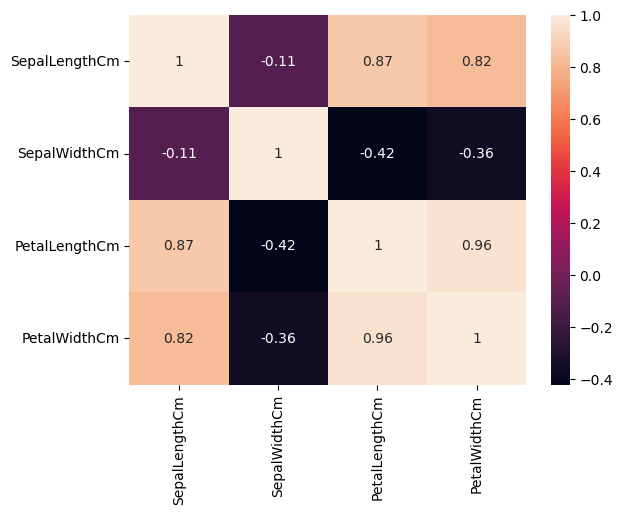

In [17]:
sns.heatmap(df_hist.corr(),annot=True)

Declare feature vector and target variable

In [22]:
x=df[['PetalLengthCm','PetalWidthCm','SepalLengthCm']]
y=df['Species']

Split data into separate training and test set

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0) 

Fit the K Neighbours Classifier to the training set

In [24]:
k=3
model = KNeighborsClassifier(n_neighbors = k) 
model.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

 Predict test-set results 

In [25]:
y_pred_test=model.predict(x_test)

Check the accuracy score

In [26]:
acc_test=accuracy_score(y_test,y_pred_test)

In [27]:
print(f"Accuracy is: {acc_test}")

Accuracy is: 0.9777777777777777


Compare the train-set and test-set accuracy

In [28]:
y_pred_train=model.predict(x_train)

In [29]:
acc_train=accuracy_score(y_train,y_pred_train)

or

In [30]:
print(f"Accuracy is: {acc_train}")

Accuracy is: 0.9809523809523809


In [31]:
model.score(x_train,y_train)

0.9809523809523809

In [32]:
model.score(x_test,y_test)

0.9777777777777777

Rebuild the kNN Classification model using different values of k (3,4,5,6,7,8,9) USING TABULATE:,
Tabulate the results using the Tabulate package

In [33]:
splits = [0.2, 0.25, 0.3]
k_values = [3, 4, 5, 6, 7, 8, 9]
results = []

In [34]:
for k in k_values:
    for i in splits:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=0)
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)

        results.append([k, 1 - i, i, precision, recall, f1, accuracy])

headers = ["k", "Train Size", "Test Size", "Precision", "Recall", "F1 Score", "Accuracy"]

table = tabulate(results, headers=headers, tablefmt="pretty")
print(table)

+---+------------+-----------+--------------------+--------------------+--------------------+--------------------+
| k | Train Size | Test Size |     Precision      |       Recall       |      F1 Score      |      Accuracy      |
+---+------------+-----------+--------------------+--------------------+--------------------+--------------------+
| 3 |    0.8     |    0.2    |        1.0         |        1.0         |        1.0         |        1.0         |
| 3 |    0.75    |   0.25    | 0.9763157894736842 | 0.9736842105263158 | 0.9739522830846216 | 0.9736842105263158 |
| 3 |    0.7     |    0.3    | 0.9796296296296295 | 0.9777777777777777 | 0.9779434092477569 | 0.9777777777777777 |
| 4 |    0.8     |    0.2    |        1.0         |        1.0         |        1.0         |        1.0         |
| 4 |    0.75    |   0.25    | 0.9763157894736842 | 0.9736842105263158 | 0.9739522830846216 | 0.9736842105263158 |
| 4 |    0.7     |    0.3    | 0.9796296296296295 | 0.9777777777777777 | 0.97794

Display confusion matrix

In [35]:
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for k=3:")
print(cm)

Confusion Matrix for k=3:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


Generate classification report

In [36]:
report = classification_report(y_test, y_pred_test)
print("Classification Report for k=3:")
print(report)

Classification Report for k=3:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



Evaluate classification error

In [37]:
classification_error = 1 - accuracy_score(y_test, y_pred_test)
print("Classification Error:", classification_error)


Classification Error: 0.022222222222222254


Generate ROC curve and ROC AUC score.

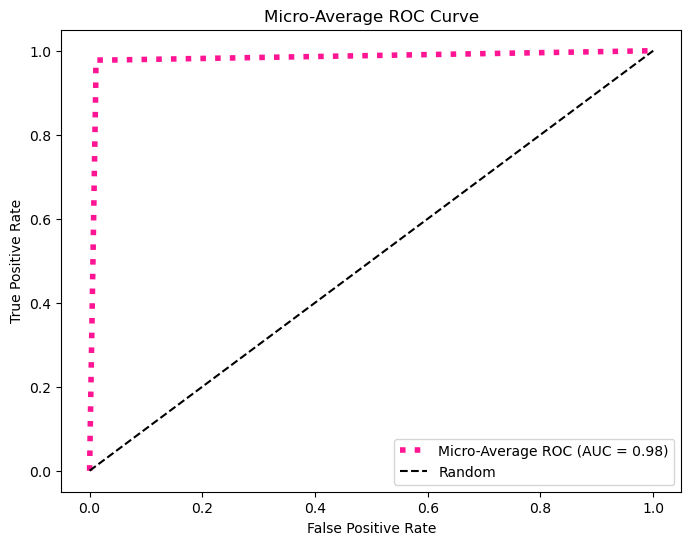

Micro-Average ROC AUC Score: 0.9828395061728395


In [43]:
y_binary = label_binarize(y, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

x_train, x_test, y_train, y_test = train_test_split(x, y_binary, test_size=0.3, random_state=0)

k = 3
model = KNeighborsClassifier(n_neighbors=k)

classifier = OneVsRestClassifier(model)
classifier.fit(x_train, y_train)

y_probs = classifier.predict_proba(x_test)
# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-Average ROC (AUC = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Average ROC Curve')
plt.legend()
plt.show()

print("Micro-Average ROC AUC Score:", roc_auc["micro"])

Perform k-fold validation

In [44]:
k_fold = 5
cv_scores = cross_val_score(model, x, y, cv=k_fold, scoring='accuracy')

print(f'Cross-Validation Scores (k={k_fold}):', cv_scores)
print(f'Mean Accuracy: {cv_scores.mean():.2f}')

Cross-Validation Scores (k=5): [0.96666667 0.96666667 0.96666667 0.96666667 1.        ]
Mean Accuracy: 0.97
